In [173]:
# 1) 查看前2行和后2行数据
import pandas as pd
pd.set_option('display.max_columns', None)  # 设置显示最大列
df = pd.read_csv(r'./HR_comma_sep.csv')
pd.set_option('display.max_rows', 4)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
...,...,...,...,...,...,...,...,...,...,...
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [174]:
# 数据维度14999行×10列, 除过岗位和薪资水平是字符型外, 其余均是数字

In [175]:
# 2)查看数据类型等信息
# 前两个特征为64位浮点型, 后两个为字符型, 其余为64位整型, 且均无缺失值.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [176]:
# 3). 描述性统计
# 1) 员工对公司满意度平均水平如何？员工的最新考核情况又是如何？员工所参加项目数是怎样？员工平均每月工作时长以及平均工作年限分别是多少？
# 员工对公司的满意度: 范围 0.09~1, 中位数0.640, 均值0.613, 总体来说员工对公司较满意
#  最新考核评估: 范围 0.36~1, 中位数0.720, 均值0.716, 员工考核平均水平中等偏上.
# 项目数: 范围 2~7个, 中位数4, 均值3.8, 平均参加项目数为4个
# 平均每月工作时长: 范围96~310小时, 中位数200, 均值201
# 工作年限: 范围2~10年, 中位数3, 均值3.5
df.describe()
df.describe(include=['O']).T

,count,unique,top,freq
sales,14999,10,sales,4140
salary,14999,3,low,7316


In [177]:
# 2) 当前离职率是多少？工作事故发生率？过去5年升职率？薪资水平又如何？共有多少种岗位？
# 当前离职率为23.81%

#工作事故发生率14.46%.
#薪资水平共有3个等级, 最多的是低等, 多达7316人.

# 员工岗位有10种, 其中最多的是销售, 多达4140人
# 过去5年升职率2.13%.
pd.set_option('display.max_rows', None)
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [178]:
#1) 员工对公司满意度平均水平如何？员工的最新考核情况又是如何？员工所参加项目数是怎样？员工平均每月工作时长以及平均工作年限分别是多少？
# 员工对公司的满意度: 范围 0.09~1, 中位数0.640, 均值0.613, 总体来说员工对公司较满意
#最新考核评估: 范围 0.36~1, 中位数0.720, 均值0.716, 员工考核平均水平中等偏上.
#项目数: 范围 2~7个, 中位数4, 均值3.8, 平均参加项目数为4个
#平均每月工作时长: 范围96~310小时, 中位数200, 均值201
# 工作年限: 范围2~10年, 中位数3, 均值3.5
# 2) 当前离职率是多少？工作事故发生率？过去5年升职率？薪资水平又如何？共有多少种岗位？
#当前离职率为23.81%
#工作事故发生率14.46%.
#过去5年升职率2.13%.

<Axes: xlabel='time_spend_company'>

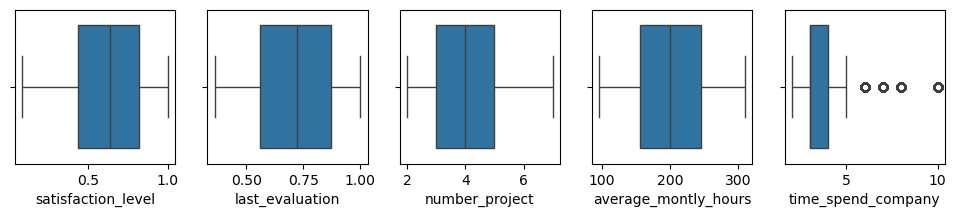

In [179]:
# 4. 数据预处理
# 1. 异常值
#通过箱线图查看异常值.
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,5, figsize=(12, 2))
sns.boxplot(x=df.columns[0], data=df, ax=ax[0])
sns.boxplot(x=df.columns[1], data=df, ax=ax[1])
sns.boxplot(x=df.columns[2], data=df, ax=ax[2])
sns.boxplot(x=df.columns[3], data=df, ax=ax[3])
sns.boxplot(x=df.columns[4], data=df, ax=ax[4])
# 除了工作年限外, 其他均无异常值. 该异常值也反映了该公司员工中以年轻人为主 

In [180]:
# 5. 可视化分析
# 在这里通过可视化的形式对第三个问题“是否离职和其他9个特征的关系如何?”进行回答.0
# 1. 人力资源总体情况

In [181]:
from pyecharts import options as opts
from pyecharts.charts import Pie

# 数据
attr = ["离职", "在职"]
v1 = [str(df.left.value_counts()[1]), str(df.left.value_counts()[0])]

# 创建饼图
pie = (
    Pie()
    .add("员工状态", [list(z) for z in zip(attr, v1)], radius=["30%", "75%"])
    .set_global_opts(title_opts=opts.TitleOpts(title="员工状态分布"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
)

# 在notebook中显示
pie.render("员工状态分布.html")


'c:\\data\\program\\python\\数据工程\\员工状态分布.html'

In [182]:
from pyecharts.charts import Boxplot
from pyecharts import options as opts
import pandas as pd

# 假设df是已加载的数据框，重命名列
df.columns = ['satisfaction', 'evaluation', 'project', 'hours', 'years_work', 'work_accident', 'left', 'promotion', 'department', 'salary']

# 数据准备
x_axis = ['在职', '离职']
y_axis = [
    df[df['left'] == 0]['satisfaction'].values.tolist(),
    df[df['left'] == 1]['satisfaction'].values.tolist()
]

# 绘制箱线图
boxplot = Boxplot()
boxplot.add_xaxis(x_axis)
boxplot.add_yaxis('', boxplot.prepare_data(y_axis))

# 配置图表
boxplot.set_global_opts(title_opts=opts.TitleOpts(title="对公司满意度与是否离职关系图", pos_left="center"))

# 渲染图表
boxplot.render("对公司满意度与是否离职关系图.html")


'c:\\data\\program\\python\\数据工程\\对公司满意度与是否离职关系图.html'

In [183]:
from pyecharts.charts import Boxplot
from pyecharts import options as opts
import pandas as pd

# 假设df是已加载的数据框，重命名列
df.columns = ['satisfaction', 'evaluation', 'project', 'hours', 'years_work', 'work_accident', 'left', 'promotion', 'department', 'salary']

# 数据准备
x_axis = ['在职', '离职']
y_axis = [
    df[df['left'] == 0]['evaluation'].values.tolist(),
    df[df['left'] == 1]['evaluation'].values.tolist()
]

# 绘制箱线图
boxplot = Boxplot()
boxplot.add_xaxis(x_axis)
boxplot.add_yaxis('', boxplot.prepare_data(y_axis))

# 配置图表
boxplot.set_global_opts(title_opts=opts.TitleOpts(title="最新评估与是否离职关系图", pos_left="center"))

# 渲染图表
boxplot.render("最新评估与是否离职关系图.html")


'c:\\data\\program\\python\\数据工程\\最新评估与是否离职关系图.html'

In [184]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Pie, Grid
import pandas as pd


# 按照项目数分组分别求离职人数和所有人数
project_left_1 = df[df['left'] == 1].groupby('project')['left'].count()
project_all = df.groupby('project')['left'].count()

# 分别计算离职人数和在职人数所占比例
project_left1_rate = project_left_1 / project_all
project_left0_rate = 1 - project_left1_rate

attr = project_left1_rate.index.tolist()
data_pair=list(zip(project_all.index, project_all.values))
# 绘制柱状图
bar = (
    Bar(init_opts=opts.InitOpts(width="1200px"))
    .add_xaxis(attr)
    .add_yaxis("离职", project_left1_rate.tolist(), stack="stack1")
    .add_yaxis("在职", project_left0_rate.tolist(), stack="stack1")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="所参加项目数与是否离职的关系图", pos_left="10%"), 
        legend_opts=opts.LegendOpts(orient="vertical", pos_left="left")
    )
)

# 绘制饼图
pie = (
    Pie(init_opts=opts.InitOpts(width="600px", height="400px"))  # 设置饼图初始宽度和高度
   .add(
        series_name="项目人数占比",
        data_pair=[(str(item[0]), str(item[1])) for item in data_pair],  
        radius=["25%", "50%"],  
        label_opts=opts.LabelOpts(is_show=True, position="outside", font_size=14, formatter="{b}: {d}%"),
        center=["75%", "60%"]  # 设置饼图的中心坐标
    )
   .set_global_opts(
        title_opts=opts.TitleOpts(title="各项目人数所占比例", pos_right="20%"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_left="80%")
    )
)

# 绘制网格布局
grid = (
    Grid()
   .add(bar, grid_opts=opts.GridOpts(pos_left="0%", pos_right="50%"))
   .add(pie, grid_opts=opts.GridOpts(pos_left="50%", pos_right="100%"))
)
# 渲染图表到HTML文件
grid.render("所参加项目数与是否离职的关系图和各项目人数所占比例.html",)

'c:\\data\\program\\python\\数据工程\\所参加项目数与是否离职的关系图和各项目人数所占比例.html'

In [185]:
from pyecharts import options as opts
from pyecharts.charts import Boxplot
import pandas as pd

# 假设 df 是已加载的 DataFrame
# df = pd.read_csv('your_data.csv')

# 获取在职和离职员工的每月工作时长数据
in_job_hours = df[df['left'] == 0]['hours'].values
left_job_hours = df[df['left'] == 1]['hours'].values

# 将数据转换为列表
in_job_hours_list = in_job_hours.tolist()
left_job_hours_list = left_job_hours.tolist()

# 构建箱线图数据
data = [
    in_job_hours_list,
    left_job_hours_list
]

# 使用 prepare_data 处理数据格式
boxplot_data = Boxplot().prepare_data(data)

# 绘制箱线图
boxplot = (
    Boxplot()
    .add_xaxis(['在职', '离职'])
    .add_yaxis("工作时长", boxplot_data)
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="平均每月工作时长与是否离职的关系图", 
            pos_left="center", 
            title_textstyle_opts=opts.TextStyleOpts(font_size=16)  # 调整标题字体大小
        ),
        tooltip_opts=opts.TooltipOpts(
            trigger="item", 
            axis_pointer_type="shadow",
            
        ),
        legend_opts=opts.LegendOpts(
            pos_left="left",  # 将图例放置在左侧
            orient="vertical"  # 纵向排列
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category", 
            name="是否离职", 
            name_location="middle",
            name_gap=30  # 增加X轴标题和图表之间的间距
        ),
        yaxis_opts=opts.AxisOpts(
            name="工作时长（小时）", 
            name_location="middle", 
            splitline_opts=opts.SplitLineOpts(is_show=True),
            name_gap=40  # 增加Y轴标题和图表之间的间距
        )
    )
)

# 渲染图表
boxplot.render("平均每月工作时长与是否离职的关系图.html")


'c:\\data\\program\\python\\数据工程\\平均每月工作时长与是否离职的关系图.html'

In [186]:
from pyecharts.charts import Bar, Pie, Grid
from pyecharts import options as opts

# 计算数据
years_left_0 = df[df.left == 0].groupby('years_work')['left'].count()  # 在职人数
years_left_1 = df[df.left == 1].groupby('years_work')['left'].count()  # 离职人数
years_all = df.groupby('years_work')['left'].count()  # 总人数

# 计算离职和在职的比例
years_left0_rate = years_left_0 / years_all
years_left1_rate = years_left_1 / years_all

# 工作年限
years = years_all.index

# 创建 Bar 图
bar = (
    Bar()
    .add_xaxis(years.tolist())
    .add_yaxis("离职", years_left1_rate.tolist(), stack="stack1")
    .add_yaxis("在职", years_left0_rate.tolist(), stack="stack1")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="工作年限与是否离职的关系图", pos_left="10%"),
        xaxis_opts=opts.AxisOpts(name="工作年限"),
        yaxis_opts=opts.AxisOpts(name="比例"),
        legend_opts=opts.LegendOpts(pos_left="left", orient="vertical")
    )
)

# 创建 Pie 图
pie = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(years_all.index.tolist(), years_all.tolist())],
        radius=[30, 70],
        rosetype="radius",
        label_opts=opts.LabelOpts(is_show=True, position="inside", formatter="{b}: {d}%")
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各工作年限所占百分比", pos_left="center"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_left="67%")
    )
)

# 创建 Grid 布局
grid = (
    Grid()
    .add(bar, grid_opts=opts.GridOpts(pos_right="67%"))
    .add(pie, grid_opts=opts.GridOpts())  # 为 pie 图指定 grid_opts
)

# 渲染图表
grid.render("工作年限与是否离职的关系图和各工作年限所占百分比.html")


'c:\\data\\program\\python\\数据工程\\工作年限与是否离职的关系图和各工作年限所占百分比.html'

In [187]:
from pyecharts.charts import Bar
from pyecharts import options as opts
import pandas as pd

# 假设 df 是你的 DataFrame，计算工作事故与离职的交叉表
accident_left = pd.crosstab(df.work_accident, df.left)

# 设置分类标签
attr = accident_left.index.tolist()

# 创建 Bar 图
bar = (
    Bar()
    .add_xaxis(attr)  # 设置 X 轴为事故发生情况
    .add_yaxis("离职", accident_left[1].tolist(), stack="stack1")  # 离职人员
    .add_yaxis("在职", accident_left[0].tolist(), stack="stack1")  # 在职人员
    .set_global_opts(
        title_opts=opts.TitleOpts(title="是否发生工作事故与是否离职的关系图", pos_left="center"),
        xaxis_opts=opts.AxisOpts(name="工作事故发生情况"),
        yaxis_opts=opts.AxisOpts(name="人数"),
        legend_opts=opts.LegendOpts(pos_left="left", orient="vertical"),
    )
)

# 渲染图表
bar.render("是否发生工作事故与是否离职的关系图.html")


'c:\\data\\program\\python\\数据工程\\是否发生工作事故与是否离职的关系图.html'

In [188]:
from pyecharts.charts import Bar
from pyecharts import options as opts
import pandas as pd

# 假设 df 是你的 DataFrame，计算升职与离职的交叉表
promotion_left = pd.crosstab(df.promotion, df.left)

# 设置分类标签
attr = promotion_left.index.tolist()

# 创建 Bar 图
bar = (
    Bar()
    .add_xaxis(attr)  # 设置 X 轴为升职情况
    .add_yaxis("离职", promotion_left[1].tolist(), stack="stack1")  # 离职人员
    .add_yaxis("在职", promotion_left[0].tolist(), stack="stack1")  # 在职人员
    .set_global_opts(
        title_opts=opts.TitleOpts(title="5年内是否升职与是否离职的关系图", pos_left="center"),
        xaxis_opts=opts.AxisOpts(name="升职情况"),
        yaxis_opts=opts.AxisOpts(name="人数"),
        legend_opts=opts.LegendOpts(pos_left="left", orient="vertical"),
    )
)

# 渲染图表
bar.render("5年内是否升职与是否离职的关系图.html")


'c:\\data\\program\\python\\数据工程\\5年内是否升职与是否离职的关系图.html'

In [189]:
from pyecharts.charts import Bar, Pie, Grid
from pyecharts import options as opts
import pandas as pd

# 假设 df 是你的 DataFrame，计算岗位与离职情况的交叉数据
department_left_0 = df[df.left == 0].groupby('department')['left'].count()  # 在职人数
department_all = df.groupby('department')['left'].count()  # 总人数
department_left0_rate = department_left_0 / department_all  # 在职比例
department_left1_rate = 1 - department_left0_rate  # 离职比例

# 岗位名称
attr = department_all.index.tolist()

# 创建 Bar 图
bar = (
    Bar()
    .add_xaxis(attr)  # 设置 X 轴为岗位
    .add_yaxis("离职", department_left1_rate.tolist(), stack="stack1")  # 离职比例
    .add_yaxis("在职", department_left0_rate.tolist(), stack="stack1")  # 在职比例
    .set_global_opts(
        title_opts=opts.TitleOpts(title="岗位与离职比例的关系图", pos_top="1%"),
        xaxis_opts=opts.AxisOpts(name="岗位", interval=0, axislabel_opts=opts.LabelOpts(rotate=30)),
        yaxis_opts=opts.AxisOpts(name="比例"),
        legend_opts=opts.LegendOpts(pos_top="1%", pos_right="50%", orient="vertical"),
        datazoom_opts=opts.DataZoomOpts(is_show=True),
    )
)

# 创建 Pie 图
pie = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(department_all.index.tolist(), department_all.tolist())],
        radius=[18, 35],
        center=["80%", "30%"],  # 设置位置，百分比形式，调整横向和纵向位置
        label_opts=opts.LabelOpts(is_show=True, position="inside", formatter="{b}: {d}%"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各个岗位所占百分比", pos_left="right"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_right="1%", pos_top="10%")
    )
)

# 创建 Grid 布局并添加图表
grid = (
    Grid()
    .add(bar, grid_opts=opts.GridOpts(pos_top="15%", pos_left="5%", width="50%", height="80%"))
    .add(pie, grid_opts=opts.GridOpts())  # 不再设置 pie 图的具体 grid_opts
)

# 渲染图表
grid.render("岗位与离职比例的关系图和各个岗位所占百分比.html")


'c:\\data\\program\\python\\数据工程\\岗位与离职比例的关系图和各个岗位所占百分比.html'

In [190]:
from pyecharts import options as opts
from pyecharts.charts import Bar
import pandas as pd

# 假设df是你的数据框
# df = pd.read_csv('data.csv')  # 加载数据

# 创建薪资与离职的交叉表
salary_left = pd.crosstab(df['salary'], df['left']).sort_values(0, ascending=False)
salary_levels = salary_left.index.tolist()

# 绘制柱状图
bar = (
    Bar()
    .add_xaxis(salary_levels)
    .add_yaxis("离职", salary_left[1].tolist(), stack="stack1")
    .add_yaxis("在职", salary_left[0].tolist(), stack="stack1", label_opts=opts.LabelOpts(is_show=True))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="薪资水平与是否离职的关系图", pos_top="1%", pos_left="center"),
        legend_opts=opts.LegendOpts(pos_left="left", orient="vertical"),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
    )
)

bar.render("薪资水平与是否离职的关系图.html")


'c:\\data\\program\\python\\数据工程\\薪资水平与是否离职的关系图.html'

In [191]:
# 6. 特征工程

In [192]:
# 1) 定序
df['salary'] = df.salary.map({"low": 0, "medium": 1, "high": 2})
df.salary.unique()

array([0, 1, 2], dtype=int64)

In [193]:
#  2) 定类
df_one_hot = pd.get_dummies(df, prefix="dep")
df_one_hot.shape

(14999, 19)

In [194]:
# #采用max-min归一化方法
hours = df_one_hot['hours']
df_one_hot['hours'] = df_one_hot.hours.apply(lambda x: (x-hours.min()) / (hours.max()-hours.min()))

<Axes: >

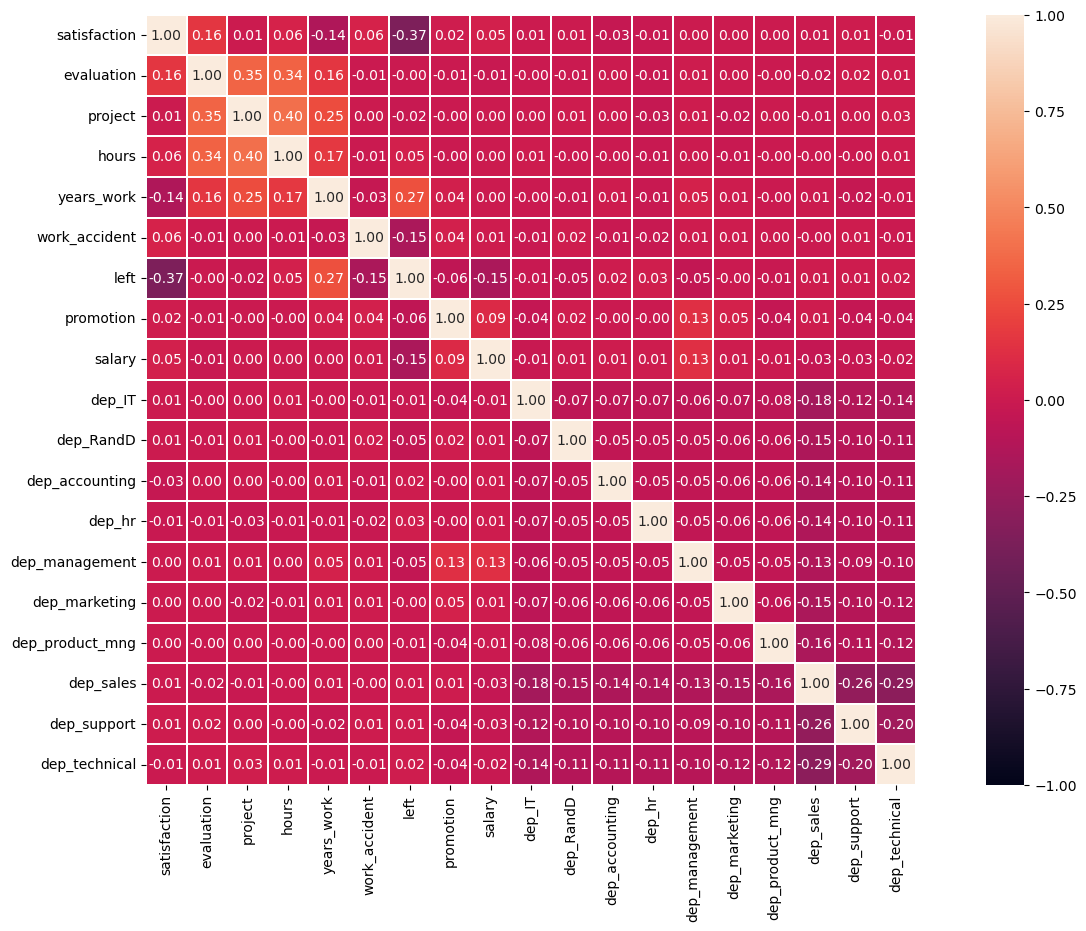

In [195]:
#计算相关系数
correlation = df_one_hot.corr(method = "spearman")
plt.figure(figsize=(18, 10))
#绘制热力图
sns.heatmap(correlation, linewidths=0.2, vmax=1, vmin=-1, linecolor='w',fmt='.2f',
            annot=True,annot_kws={'size':10},square=True)

In [196]:
# 7. 逻辑回归模型

In [197]:
# 1. 划分数据集
from sklearn.model_selection import train_test_split
#划分训练集和测试集
X = df_one_hot.drop(['left'], axis=1)
y = df_one_hot['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [198]:
# # 2. 训练模型
# from sklearn.linear_model import LogisticRegression
# LR = LogisticRegression()
# print(LR.fit(X_train, y_train))
# print("训练集准确率: ", LR.score(X_train, y_train))
# print("测试集准确率: ", LR.score(X_test, y_test))

In [199]:
#指定随机梯度下降优化算法
# LR = LogisticRegression(solver='saga')
# print(LR.fit(X_train, y_train))
# print("训练集准确率: ", LR.score(X_train, y_train))
# print("测试集准确率: ", LR.score(X_test, y_test))

In [ ]:
#3. 调参
#用准确率进行10折交叉验证选择合适的参数C
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
import numpy as np
Cs = 10**np.linspace(-10, 10, 400)
lr_cv = LogisticRegressionCV(Cs=Cs, cv=10, penalty='l2', solver='saga',  max_iter=10000, scoring='accuracy')
lr_cv.fit(X_train, y_train)
lr_cv.C_
LR = LogisticRegression(solver='saga', penalty='l2', C=25.52908068)
print( LR.fit(X_train, y_train))
print("训练集准确率: ", LR.score(X_train, y_train))
print("测试集准确率: ", LR.score(X_test, y_test))

In [ ]:
from sklearn import metrics
X_train_pred = LR.predict(X_train)
X_test_pred = LR.predict(X_test)
print('训练集混淆矩阵:')
print(metrics.confusion_matrix(y_train, X_train_pred))
print('测试集混淆矩阵:')
print(metrics.confusion_matrix(y_test, X_test_pred))

训练集混淆矩阵:
[[8494  647]
 [1771 1087]]
测试集混淆矩阵:
[[2112  175]
 [ 431  282]]


In [ ]:
from sklearn.metrics import classification_report
print('训练集:')
print(classification_report(y_train, X_train_pred))
print('测试集:')
print(classification_report(y_test, X_test_pred))

训练集:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      9141
           1       0.63      0.38      0.47      2858

    accuracy                           0.80     11999
   macro avg       0.73      0.65      0.67     11999
weighted avg       0.78      0.80      0.78     11999

测试集:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2287
           1       0.62      0.40      0.48       713

    accuracy                           0.80      3000
   macro avg       0.72      0.66      0.68      3000
weighted avg       0.78      0.80      0.78      3000



In [ ]:
# 8. 朴素贝叶斯模型

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
#构建高斯朴素贝叶斯模型
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("训练集准确率: ", gnb.score(X_train, y_train))
print("测试集准确率: ", gnb.score(X_test, y_test))
X_train_pred =gnb.predict(X_train)
X_test_pred = gnb.predict(X_test)
print('训练集混淆矩阵:')
print(metrics.confusion_matrix(y_train, X_train_pred))
print('测试集混淆矩阵:')
print(metrics.confusion_matrix(y_test, X_test_pred))
print('训练集:')
print(classification_report(y_train, X_train_pred))
print('测试集:')
print(classification_report(y_test, X_test_pred))

训练集准确率:  0.7440620051670973
测试集准确率:  0.741
训练集混淆矩阵:
[[6791 2350]
 [ 721 2137]]
测试集混淆矩阵:
[[1680  607]
 [ 170  543]]
训练集:
              precision    recall  f1-score   support

           0       0.90      0.74      0.82      9141
           1       0.48      0.75      0.58      2858

    accuracy                           0.74     11999
   macro avg       0.69      0.75      0.70     11999
weighted avg       0.80      0.74      0.76     11999

测试集:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2287
           1       0.47      0.76      0.58       713

    accuracy                           0.74      3000
   macro avg       0.69      0.75      0.70      3000
weighted avg       0.80      0.74      0.76      3000



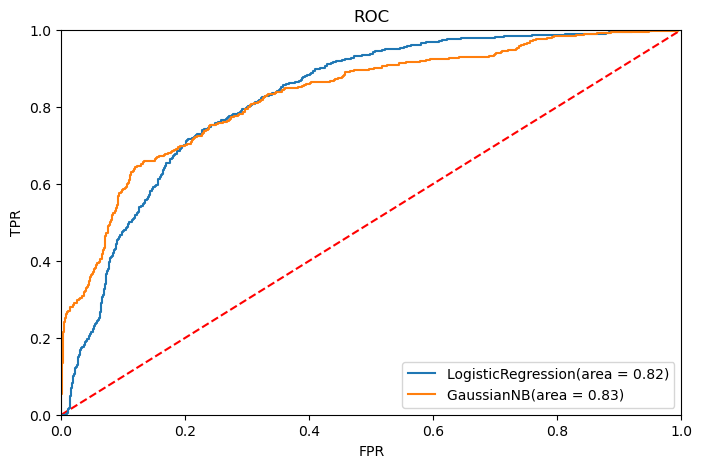

In [ ]:
# 9. 模型评估之ROC曲线
from sklearn import metrics
from sklearn.metrics import roc_curve
#将逻辑回归模型和高斯朴素贝叶斯模型预测出的概率均与实际值通过roc_curve比较返回假正率, 真正率, 阈值
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
#分别计算这两个模型的auc的值, auc值就是roc曲线下的面积
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)
gnb_roc_auc = metrics.auc(gnb_fpr, gnb_tpr)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1],'--', color='r')
plt.plot(lr_fpr, lr_tpr, label='LogisticRegression(area = %0.2f)' % lr_roc_auc)
plt.plot(gnb_fpr, gnb_tpr, label='GaussianNB(area = %0.2f)' % gnb_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [ ]:
# ROC曲线越靠近左上角说明分类效果越好, 与之对应的auc的值就越大. 对于该数据集来说, 高斯朴素贝叶斯模型略优于逻辑回归模型